                          sex       age      Time  Number_of_Warts      Type  \
sex                  1.000000  0.043682 -0.014825         0.100785 -0.104623   
age                  0.043682  1.000000  0.188981         0.000092 -0.056636   
Time                -0.014825  0.188981  1.000000         0.050800 -0.262870   
Number_of_Warts      0.100785  0.000092  0.050800         1.000000  0.148047   
Type                -0.104623 -0.056636 -0.262870         0.148047  1.000000   
Area                -0.115664 -0.064334 -0.047254        -0.107528 -0.042080   
induration_diameter  0.015202 -0.007005 -0.183656         0.062383  0.205546   
Result_of_Treatment  0.018831 -0.188314 -0.361172        -0.047160  0.083396   

                         Area  induration_diameter  Result_of_Treatment  
sex                 -0.115664             0.015202             0.018831  
age                 -0.064334            -0.007005            -0.188314  
Time                -0.047254            -0.183656       

NameError: name 'names' is not defined

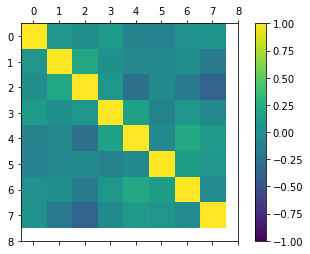

In [14]:
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

#Nome: Imunoterapia
#Esse dataset fala sobre o resultado do tratamento de verrugas utilizando Imunoterapia
#Possui 8 atributos


df = pd.read_excel('Immunotherapy.xlsx')

x = df[['sex','age','Time','Number_of_Warts', 'Type','Area','induration_diameter']]
y = df[['Result_of_Treatment']]

correlations = df.corr()
print(correlations)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

clf = LinearDiscriminantAnalysis()

'''scores = cross_val_score(clf, x, y, cv = 10)
print(scores)'''

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)

#rskf = RepeatedStratifiedKFold(n_splits=2, n_repeats=2,random_state=36851234)
#x_treino, x_teste, y_treino, y_teste = rskf.split(x, y)

#Substituição dos valores das colunas:
df.loc[df['Result_of_Treatment'] == 1, 'Result_of_Treatment'] = "Sucesso"
df.loc[df['Result_of_Treatment'] == 0, 'Result_of_Treatment'] = "Fracasso"
df.loc[df['sex'] == 1, 'sex'] = "Feminino"
df.loc[df['sex'] == 2, 'sex'] = "Masculino"

#Teste Análise Discriminatória Linear (maior score)

clf.fit(x_treino, y_treino)

print(clf.score(x_teste, y_teste))

print(pd.crosstab(y_teste.values.ravel(), clf.predict(x_teste), rownames=['Real'], colnames=['Predito T'], margins=True))


#Teste Análise Discriminatória Quadrática
'''clf = QuadraticDiscriminantAnalysis()
clf.fit(x_treino, y_treino.values.ravel())

print(clf.score(x_teste, y_teste))

print(pd.crosstab(y_teste.values.ravel(), clf.predict(x_teste), rownames=['Real'], colnames=['Predito T'], margins=True))

#Teste Floresta Randômica
clf = RandomForestClassifier()
clf.fit(x_treino, y_treino.values.ravel())

print(clf.score(x_teste, y_teste))

print(pd.crosstab(y_teste.values.ravel(), clf.predict(x_teste), rownames=['Real'], colnames=['Predito T'], margins=True))

#Teste Bagging
clf = BaggingClassifier()
clf.fit(x_treino, y_treino.values.ravel())

print(clf.score(x_teste, y_teste))

print(pd.crosstab(y_teste.values.ravel(), clf.predict(x_teste), rownames=['Real'], colnames=['Predito T'], margins=True))'''

#Histograma
df.hist()
plt.show()

#Gráfico de sexo dos pacientes
masc = df[df['sex'] == 'Masculino']['sex'].count()
fem = df[df['sex'] == 'Feminino']['sex'].count()

labels = ('Masculino (%s)'%masc, 'Feminino (%s)'%fem)
sizes = [masc, fem]
colors = ['blue', 'red']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=10)
print("Sexo dos pacientes:")
plt.axis('equal')
plt.show()

#Gráfico de idade dos pacientes
zeroto20 = df[df['age'] <= 20]['age'].count()
twentyto40 = df[df['age'] >= 20]['age'].count()
twentyto40 += df[df['age'] <= 40]['age'].count()
fortyto60 = df[df['age'] >= 40]['age'].count()
fortyto60 += df[df['age'] <= 60]['age'].count()
sixtyto80 = df[df['age'] >= 60]['age'].count()
sixtyto80 += df[df['age'] <= 80]['age'].count()
eightyto100 = df[df['age'] >= 80]['age'].count()
eightyto100 += df[df['age'] <= 100]['age'].count()

labels = ('0-20 (%s)'%zeroto20, '20-40 (%s)'%twentyto40, '40-60 (%s)'%fortyto60, '60-80 (%s)'%sixtyto80, '80-100 (%s)'%eightyto100)
sizes = [zeroto20, twentyto40, fortyto60, sixtyto80, eightyto100]
colors = ['green', 'blue', 'yellow','pink','red']

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=10)
print("Idade:")
plt.axis('equal')
plt.show()

#Gráfico de tipos de verrugas
t1 = df[df['Type'] == 1]['Type'].count()
t2 = df[df['Type'] == 2]['Type'].count()
t3 = df[df['Type'] == 3]['Type'].count()

labels = ('Tipo 1 (%s)'%t1, 'Tipo 2 (%s)'%t2, 'Tipo 3 (%s)'%t3)
sizes = [t1, t2, t3]
colors = ['green', 'blue', 'yellow']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=10)
print("Tipos de verrugas:")
plt.axis('equal')
plt.show()

#diagrama de caixa
age = df['age']
plt.boxplot(age, showfliers=True)


SyntaxError: invalid syntax (<ipython-input-14-9f979462966f>, line 1)